In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [2]:
#import data

mobilidade = pd.read_csv('../summary_reports/summary_report_PT.csv')

mobilidade = mobilidade.rename(columns={'grocery and pharmacy': 'grocery'})

filtered = mobilidade['sub_region_1'] == 'Total'

mobilidade = mobilidade[filtered]

mobilidade.head()


,country,sub_region_1,sub_region_2,date,retail,grocery,parks,transit stations,workplaces,residential
1328,Portugal,Total,Total,2020-02-15,4.0,0.0,21.0,9.0,1.0,-1.0
1329,Portugal,Total,Total,2020-02-16,-3.0,2.0,-14.0,3.0,1.0,0.0
1330,Portugal,Total,Total,2020-02-17,0.0,3.0,8.0,3.0,3.0,0.0
1331,Portugal,Total,Total,2020-02-18,2.0,3.0,6.0,5.0,3.0,0.0
1332,Portugal,Total,Total,2020-02-19,4.0,3.0,24.0,8.0,3.0,-1.0


In [3]:
confirmados = pd.read_csv('data/situacao_epidemiologica.csv')
confirmados = confirmados.rename(columns={'data_relatorio': 'date'})
confirmados.head()

,id,url,date,suspeitos,confirmados,nao_confirmados,aguarda_resultados,recuperados,obitos,em_vigilancia,...,obitos_masculino_80_sup,obitos_feminino_0_9,obitos_feminino_10_19,obitos_feminino_20_29,obitos_feminino_30_39,obitos_feminino_40_49,obitos_feminino_50_59,obitos_feminino_60_69,obitos_feminino_70_79,obitos_feminino_80_sup
0,1,https://covid19.min-saude.pt/wp-content/upload...,2020-03-03,101,4,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://covid19.min-saude.pt/wp-content/upload...,2020-03-04,117,6,NaN,NaN,NaN,0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,https://covid19.min-saude.pt/wp-content/upload...,2020-03-05,147,9,NaN,NaN,NaN,0,213.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,https://covid19.min-saude.pt/wp-content/upload...,2020-03-06,181,13,NaN,30.0,NaN,0,354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,https://covid19.min-saude.pt/wp-content/upload...,2020-03-07,224,21,NaN,47.0,NaN,0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1 = pd.merge(mobilidade, confirmados, left_on='date', right_on='date', how='left')

In [5]:
df1 = df1.fillna(0)
df1.head()

,country,sub_region_1,sub_region_2,date,retail,grocery,parks,transit stations,workplaces,residential,...,obitos_masculino_80_sup,obitos_feminino_0_9,obitos_feminino_10_19,obitos_feminino_20_29,obitos_feminino_30_39,obitos_feminino_40_49,obitos_feminino_50_59,obitos_feminino_60_69,obitos_feminino_70_79,obitos_feminino_80_sup
0,Portugal,Total,Total,2020-02-15,4.0,0.0,21.0,9.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Portugal,Total,Total,2020-02-16,-3.0,2.0,-14.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Portugal,Total,Total,2020-02-17,0.0,3.0,8.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Portugal,Total,Total,2020-02-18,2.0,3.0,6.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Portugal,Total,Total,2020-02-19,4.0,3.0,24.0,8.0,3.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


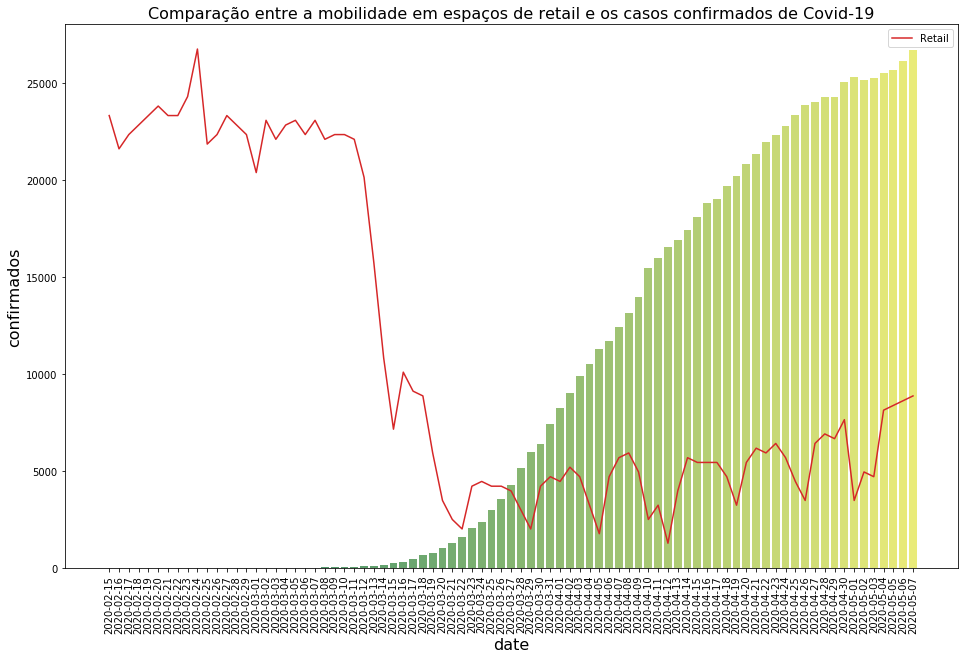

In [6]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(16,10))
plt.xticks(rotation='vertical')
color = 'tab:green'
#bar plot creation
ax1.set_title('Comparação entre a mobilidade em espaços de retail e os casos confirmados de Covid-19', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Casos Confirmados', fontsize=16)
ax1 = sns.barplot(x=df1.date, y=df1.confirmados, data = df1, palette='summer')
ax1.tick_params(axis='y')


#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
#ax2.set_ylabel('Retail', fontsize=16)
ax2 = sns.lineplot( x = df1.date, y = df1.retail, data = df1, sort=False, color=color, label='Retail')
ax2.axis('off')
ax2.tick_params(axis='y', color=color)



plt.savefig('mobilidade/comparacaoretail.png', dpi=200)
plt.show()


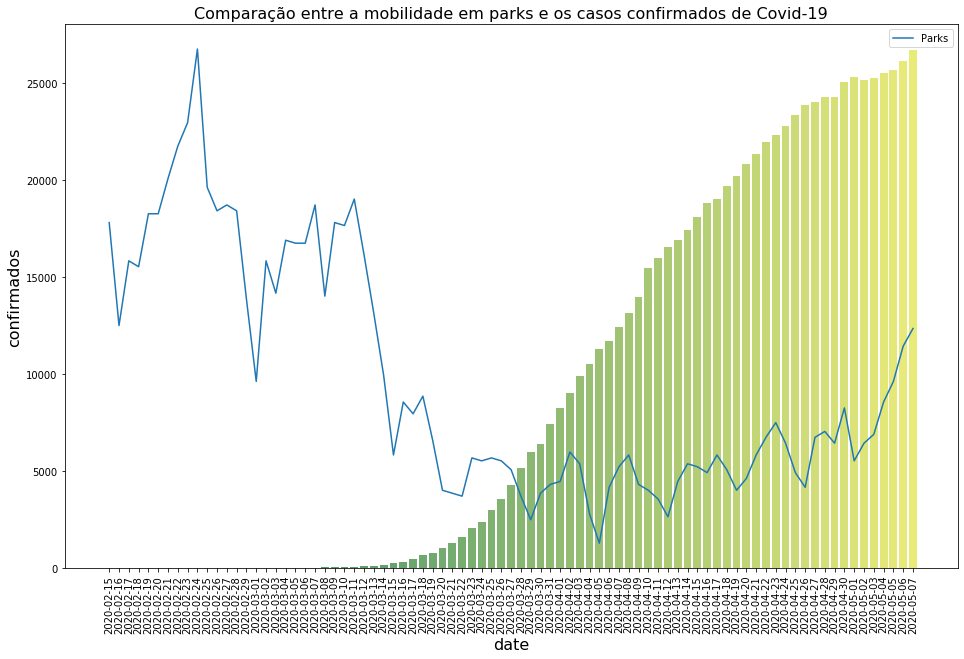

In [7]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(16,10))
plt.xticks(rotation='vertical')
color = 'tab:green'
#bar plot creation
ax1.set_title('Comparação entre a mobilidade em parks e os casos confirmados de Covid-19', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Casos Confirmados', fontsize=16)
ax1 = sns.barplot(x=df1.date, y=df1.confirmados, data = df1, palette='summer')
ax1.tick_params(axis='y')


#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
#ax3.set_ylabel('Parks', fontsize=16)
ax2 = sns.lineplot( x = df1.date, y = df1.parks, data = df1, sort=False, color=color, label='Parks')
ax2.axis('off')
ax2.tick_params(axis='y', color=color)

plt.savefig('mobilidade/comparacaoparks.png', dpi=200)
plt.show()


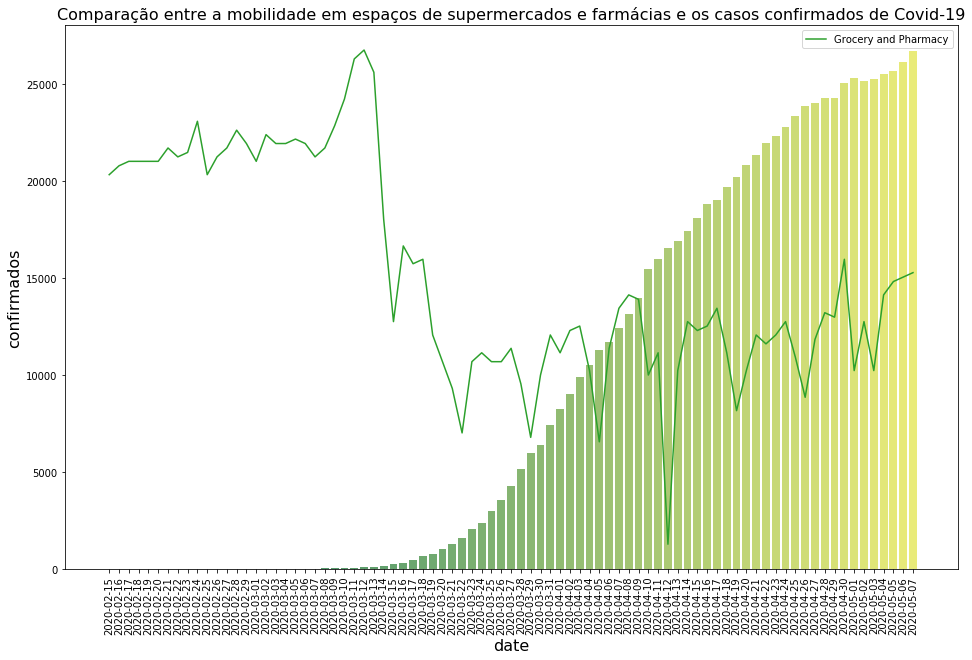

In [8]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(16,10))
plt.xticks(rotation='vertical')
color = 'tab:green'
#bar plot creation
ax1.set_title('Comparação entre a mobilidade em espaços de supermercados e farmácias e os casos confirmados de Covid-19', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Casos Confirmados', fontsize=16)
ax1 = sns.barplot(x=df1.date, y=df1.confirmados, data = df1, palette='summer')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:green'
#line plot creation
#ax3.set_ylabel('Parks', fontsize=16)
ax2 = sns.lineplot( x = df1.date, y = df1.grocery, data = df1, sort=False, color=color, label='Grocery and Pharmacy')
ax2.axis('off')
ax2.tick_params(axis='y', color=color)

plt.savefig('mobilidade/comparacaogrocery.png', dpi=200)
plt.show()



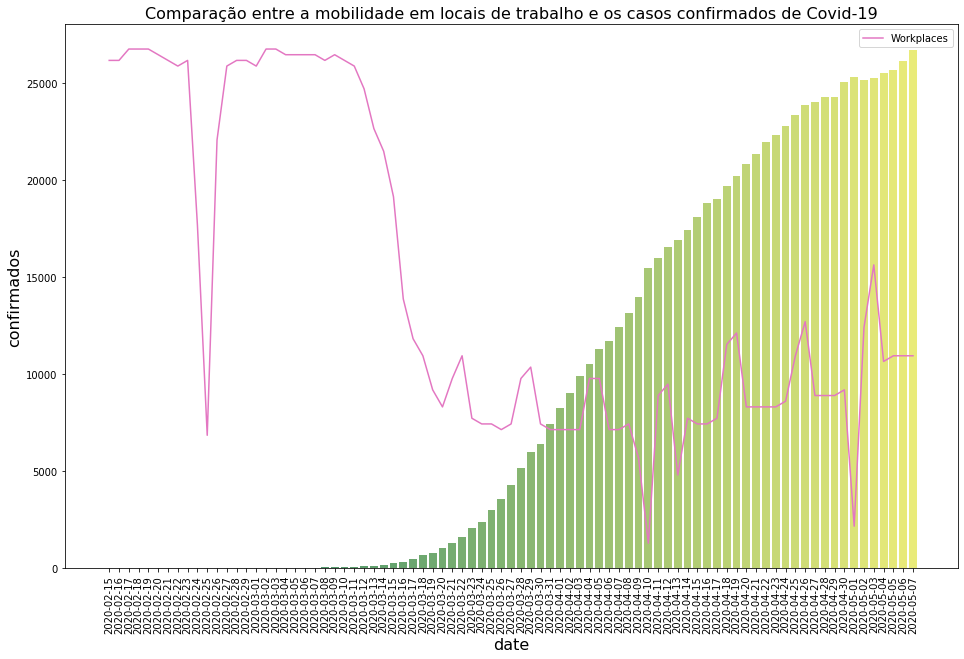

In [9]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(16,10))
plt.xticks(rotation='vertical')
color = 'tab:green'
#bar plot creation
ax1.set_title('Comparação entre a mobilidade em locais de trabalho e os casos confirmados de Covid-19', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Casos Confirmados', fontsize=16)
ax1 = sns.barplot(x=df1.date, y=df1.confirmados, data = df1, palette='summer')
ax1.tick_params(axis='y')

ax5 = ax1.twinx()
color = 'tab:pink'
#line plot creation
#ax3.set_ylabel('Parks', fontsize=16)
ax5 = sns.lineplot( x = df1.date, y = df1.workplaces, data = df1, sort=False, color=color, label='Workplaces')
ax5.axis('off')
ax5.tick_params(axis='y', color=color)

plt.savefig('mobilidade/comparacaowork.png', dpi=200)
plt.show()


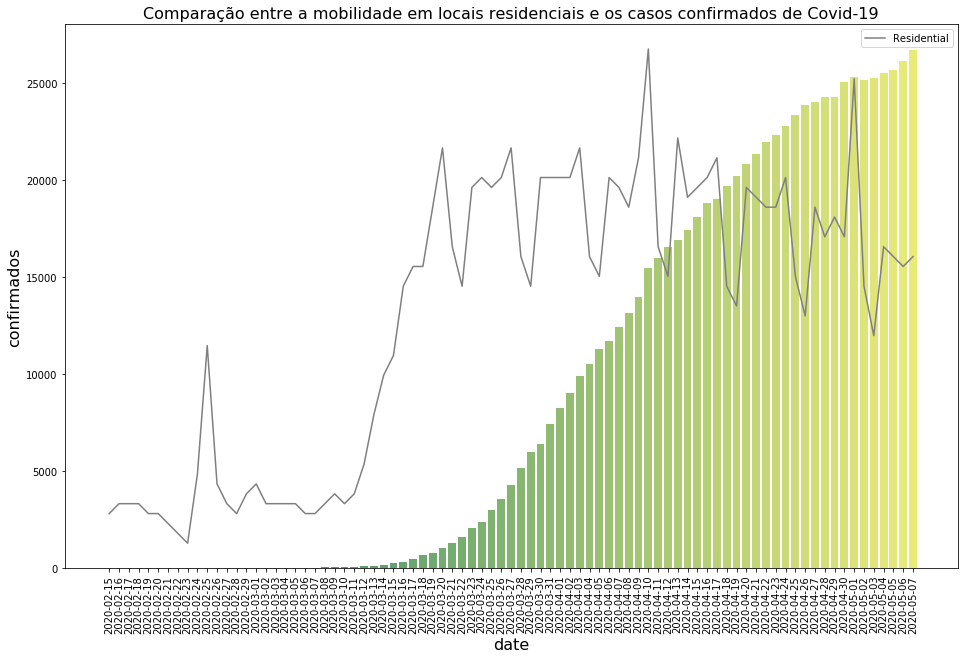

In [10]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(16,10))
plt.xticks(rotation='vertical')
color = 'tab:green'
#bar plot creation
ax1.set_title('Comparação entre a mobilidade em locais residenciais e os casos confirmados de Covid-19', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Casos Confirmados', fontsize=16)
ax1 = sns.barplot(x=df1.date, y=df1.confirmados, data = df1, palette='summer')
ax1.tick_params(axis='y')

ax6 = ax1.twinx()
color = 'tab:gray'
#line plot creation
#ax3.set_ylabel('Parks', fontsize=16)
ax6 = sns.lineplot( x = df1.date, y = df1.residential, data = df1, sort=False, color=color, label='Residential')
ax6.axis('off')
ax6.tick_params(axis='y', color=color)

plt.savefig('mobilidade/comparacaoresidential.png', dpi=200)
plt.show()


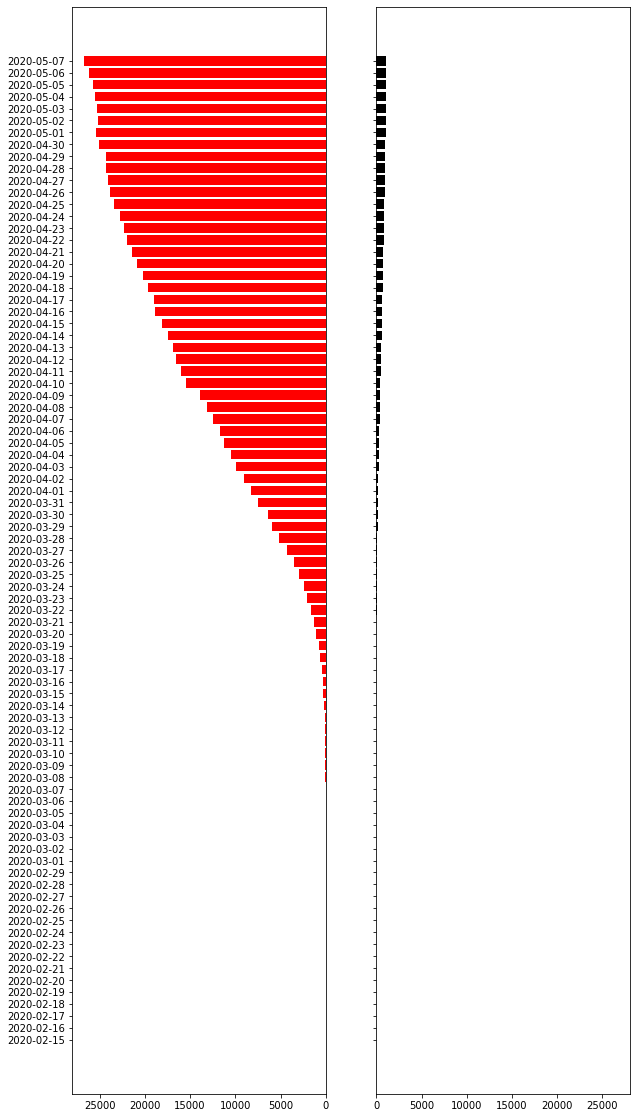

In [11]:
fig, (ax_casos, ax_obitos) = plt.subplots(ncols=2, sharey=True, figsize=(10,20))
ax_casos.barh(df1.date, df1.confirmados, align='center', color='red')
ax_obitos.barh(df1.date, df1.obitos, align='center', color='black')


ax_obitos.set_xlim(ax_casos.get_xlim())
ax_casos.invert_xaxis()
plt.savefig('mobilidade/casosconfirmadosvsobitos.png', dpi=200)

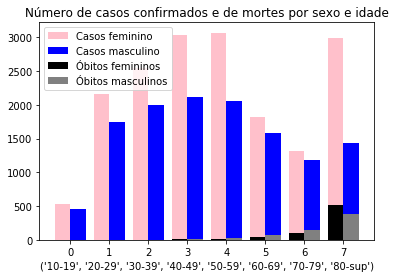

In [12]:
recente = confirmados.sort_values(by=['date'], ascending=False).head(1)['date'].values
recente[0]

feminino = confirmados.filter(regex=("obitos_feminino|data"))[ confirmados.date == recente[0] ].values
masculino = confirmados.filter(regex=("obitos_masculino|data"))[ confirmados.date == recente[0] ].values
feminino_confirmados =  confirmados.filter(regex=("confirmados_feminino|data"))[ confirmados.date == recente[0] ].values
masculino_confirmados =  confirmados.filter(regex=("confirmados_masculino|data"))[ confirmados.date == recente[0] ].values

obitos_feminino = feminino[0][1:]
obitos_masculino = masculino[0][1:]
confirmados_feminino = feminino_confirmados[0][1:]
confirmados_masculino = masculino_confirmados[0][1:]



escalões = '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-sup'

x = np.arange(len(escalões))


width=0.4

plt.bar(x - 0.2, confirmados_feminino, width=width , color="pink")
plt.bar(x + 0.2, confirmados_masculino, width=width , color="blue")
plt.bar( x - 0.2, obitos_feminino, width=width , color="black")
plt.bar( x + 0.2, obitos_masculino, width=width, color="gray")


plt.title('Número de casos confirmados e de mortes por sexo e idade')
plt.xlabel(escalões)
plt.legend([ 'Casos feminino', 'Casos masculino', 'Óbitos femininos', 'Óbitos masculinos'], loc='upper left')
plt.savefig('stats/obitos_confirmados.png', dpi=200)



/Users/rafaelamachado/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


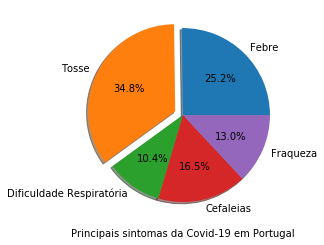

In [13]:
recente = confirmados.sort_values(by=['date'], ascending=False).head(1)['date'].values
recente[0]

febre = confirmados.filter(regex=("sintoma_febre"))[ confirmados.date == recente[0] ].values
tosse = confirmados.filter(regex=("sintoma_tosse"))[ confirmados.date == recente[0] ].values
respiracao = confirmados.filter(regex=("sintoma_respiratoria"))[ confirmados.date == recente[0] ].values
cefaleia = confirmados.filter(regex=("sintoma_cefaleia"))[ confirmados.date == recente[0] ].values
fraqueza = confirmados.filter(regex=("sintoma_fraqueza"))[ confirmados.date == recente[0] ].values
                 
colunas = 'Febre', 'Tosse', 'Dificuldade Respiratória', 'Cefaleias', 'Fraqueza'

valores = [febre, tosse, respiracao, cefaleia, fraqueza]

explode = (0, 0.1, 0, 0, 0)

plt.pie(valores, explode=explode, labels=colunas, shadow=True, autopct='%1.1f%%')

plt.xlabel("Principais sintomas da Covid-19 em Portugal")

plt.savefig('stats/sintomas.png', dpi=200)

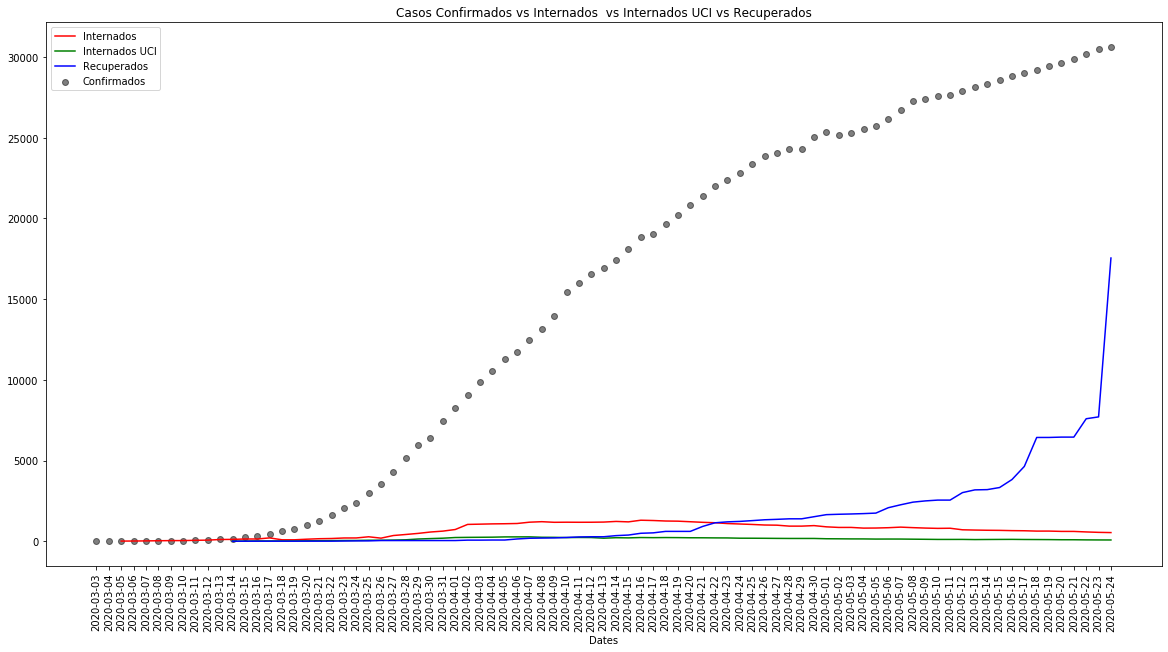

In [14]:
#Create combo chart
fig, ax = plt.subplots(figsize=(20,10))

labels = confirmados.date
values = confirmados.confirmados
values1 = confirmados.internados
values2 = confirmados.internados_uci
values3 = confirmados.recuperados
y_pos = np.arange(len(labels))

ax.scatter(y_pos, values, alpha=0.5, color='black', label="Confirmados")
plt.xticks(y_pos, labels, rotation='vertical')
ax.plot(y_pos, values1, label="Internados", color="red")
ax.plot(y_pos, values2, label="Internados UCI", color="green")
ax.plot(y_pos, values3, label="Recuperados", color="blue")
#plt.ylabel('Deaths')
plt.xlabel('Dates')
plt.legend()
plt.title('Casos Confirmados vs Internados  vs Internados UCI vs Recuperados')
plt.savefig('stats/comparacao.png', dpi=200)
plt.show()
